### Exploratory Data Analysis / Food & Beverage

In [50]:
from patchworklib import *

from typing import Optional
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
# pandas options
pd.options.display.max_columns=50
pd.options.plotting.backend = 'plotly'

import pygwalker as pg
import plotly.express as px
import plotly.graph_objects as go
from plotnine import *

import janitor
import janitor.ml
import pandas_flavor as pf

from scipy.stats import zscore
import re

# read dataframe
df = pd.read_parquet('food_bev.parquet')

# expand on datetime feature
df['month'] = df.date.dt.month_name()
df['day'] = df.date.dt.day
df['day_name'] = df.date.dt.day_name()

## EDA

### Key Features & Other Information

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80414 entries, 0 to 80413
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   80414 non-null  datetime64[ns]
 1   category               80414 non-null  int64         
 2   category_names         80414 non-null  object        
 3   brand                  79323 non-null  object        
 4   pack_size              73374 non-null  object        
 5   pack_type              80414 non-null  object        
 6   itemid                 80414 non-null  int64         
 7   name                   80414 non-null  object        
 8   price_median           80414 non-null  int32         
 9   raw_discount           80414 non-null  int64         
 10  price_before_discount  80414 non-null  object        
 11  units_sold             80414 non-null  int64         
 12  stock                  80414 non-null  int64         
 13  s

In [53]:
df.isna().sum()

date                         0
category                     0
category_names               0
brand                     1091
pack_size                 7040
pack_type                    0
itemid                       0
name                         0
price_median                 0
raw_discount                 0
price_before_discount        0
units_sold                   0
stock                        0
status                       0
item_page                 9780
low_price_guarantee          0
on_flash_sale                0
can_use_bundle_deal          0
can_use_cod                  0
can_use_wholesale            0
show_free_shipping           0
like_count                   0
comment_count                0
views                    80414
no_rating                    0
star_1                       0
star_2                       0
star_3                       0
star_4                       0
star_5                       0
rating                       0
month                        0
day     

In [54]:
df.dtypes.value_counts()

int64             14
object             8
bool               6
float64            3
int32              2
datetime64[ns]     1
Name: count, dtype: int64

In [55]:
def plot_top_entries(
    dataframe: pd.DataFrame, 
    col: Optional[str | list], 
    params:dict, 
    exclude=Optional[list], 
    n: int=30)\
    -> go.Figure():
    """
        
        Creates a plot base on the desired column.
        
    :dataframe: Retail dataframe to plot top entries.
    :dataframe type: Pandas DataFrame.
    :col: name of the column in the dataframe.
    :col type: string or list
    :params: Plotly plotting parameters. 
    :params type: Dictionary
    :exclude: Column names to exclude in plotting
    :exclude type: List
    :n: Default at 15
    :n type: int
    :rtype: Plotly Figure Object
    
    """
    if col not in exclude:
        fig = dataframe[col].value_counts()[:n]\
            .plot.bar(**params)
        fig.update_layout(font={'size': 10})
        return fig.show()

In [56]:
plot_params = {
    'height': 400,
    'width': 800,
    'template': 'ggplot2'
}

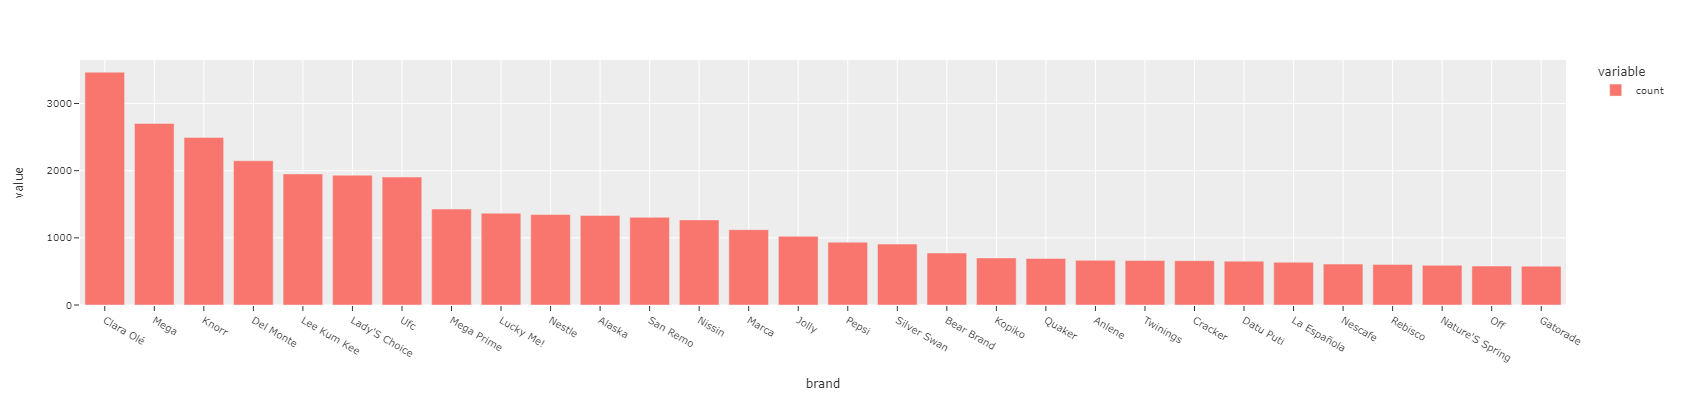

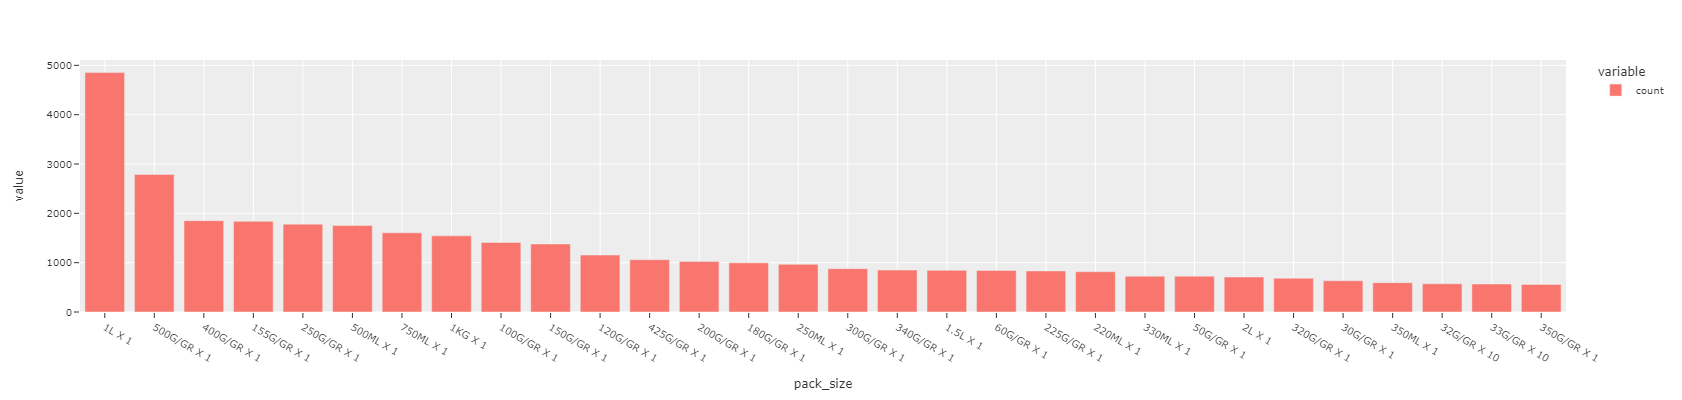

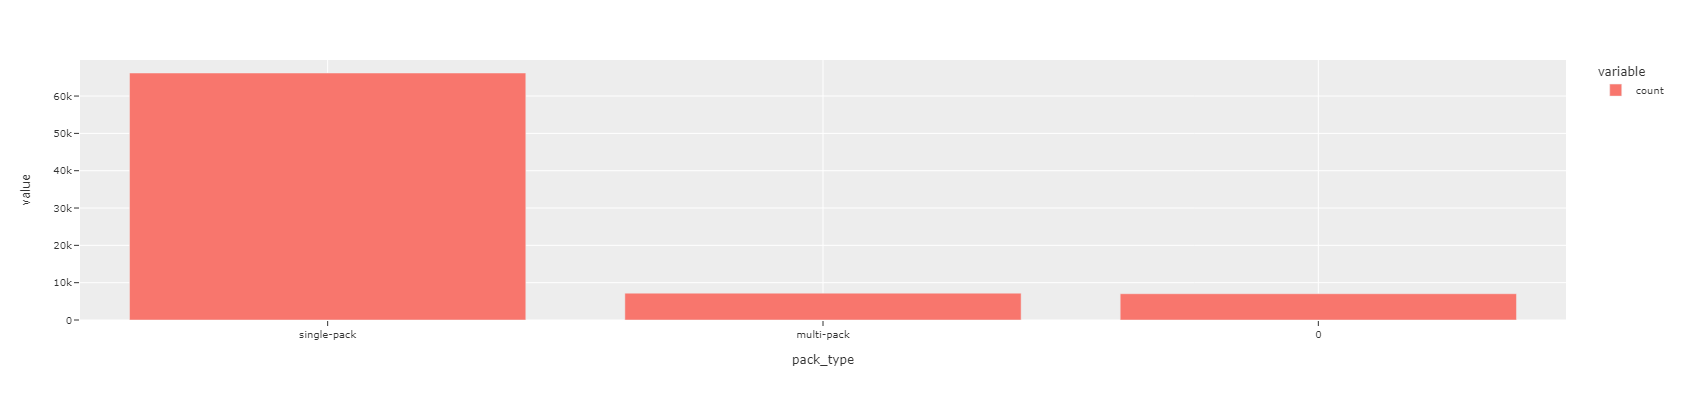

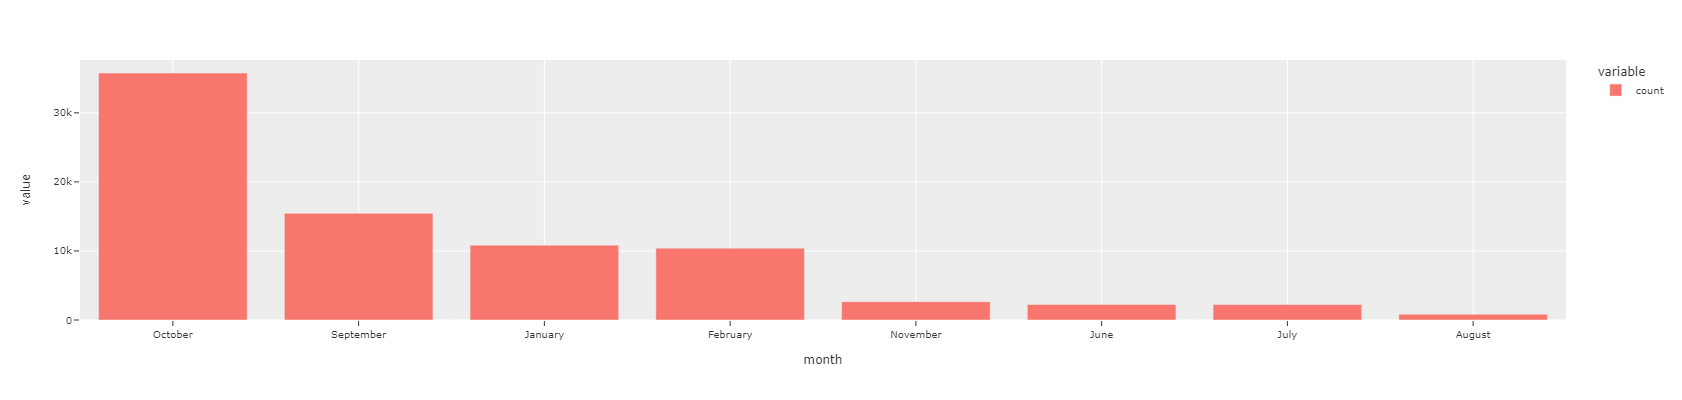

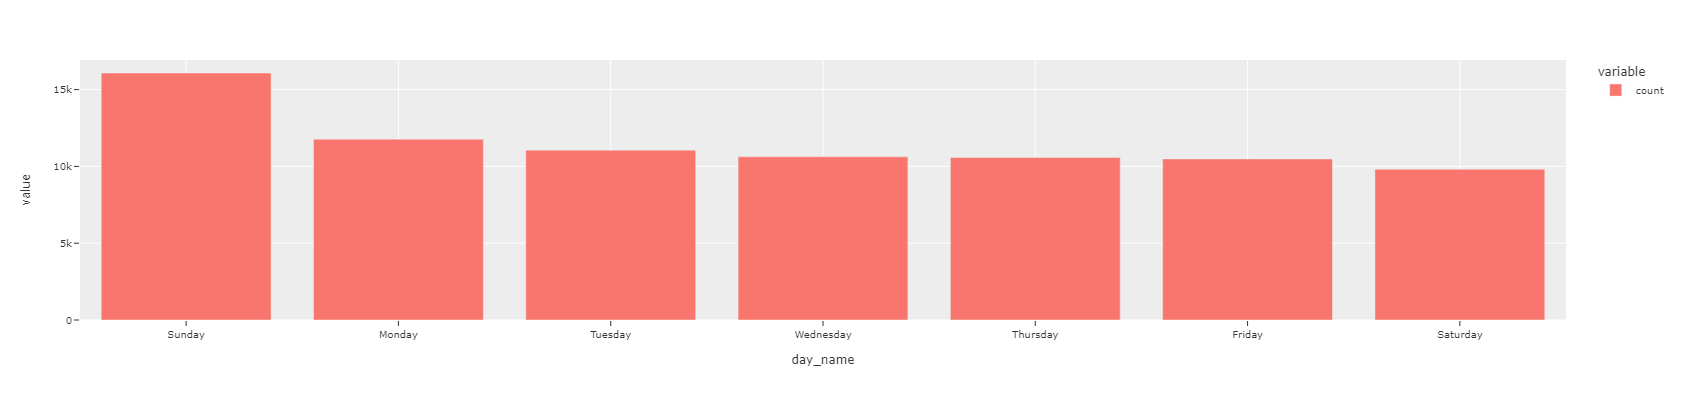

In [57]:
# plotting code block using function `plot_top_entries`
cat_features = df.select_dtypes('object')
for col in cat_features:
    plot_top_entries(
        df, 
        col, 
        plot_params, 
        exclude=['category_names', 'price_before_discount', 'name'])

In [58]:
df[df.pack_type == '0'].brand.value_counts()

brand
Lucky Me!                 1096
Nissin                     748
Mama Sita'S                527
Clara Olé                  501
Mega                       279
Pokka                      274
Cracker                    263
Arbor Mist                 254
Off                        204
Magnolia                   179
Dutch Mill                 141
Alaska                     133
Monde                      129
San Remo                   126
Knorr                      120
Silver Swan                116
Ufc                        116
Nestle                     115
Ensure Gold                110
Valda                      107
X & Y Coffee Roasters       79
Fita                        78
My San                      74
Family                      68
La Española                 65
Twinings                    65
Sustagen                    62
Nongshim Shin Ramyun        62
Gsm                         59
Bingo                       58
Koko Krunch                 56
The Bar                     54
Mi

#### Numerical Features for the latest month and day

In [59]:
latest_df = df.filter_on('month == "October" & day == 31').reset_index(drop=True)

In [60]:
# numerical features
num_feat = latest_df.select_dtypes('number').drop(['category', 'itemid'], axis=1)
num_feat.head(10)

price_median  raw_discount  units_sold  stock  status  item_page  \
0            94             0       97861   6613       1        NaN   
1            70             0       88058   7246       1        NaN   
2            35             0       82968   4163       1        NaN   
3            25             4       79548  33747       1        NaN   
4            16             0       79678  23444       1        NaN   
5           850             0       68914   4497       1        NaN   
6            25             4       53483  19057       1        NaN   
7            23             0       55306   5824       1        NaN   
8            38             0       62903   8518       1        NaN   
9            66             0       41853  15581       1        NaN   

   like_count  comment_count  views  no_rating  star_1  star_2  star_3  \
0        1312           9630    NaN       9073     303     117      37   
1         841           7273    NaN       6810     249      98      31   
2        1067           9804    NaN       9133     298     162      54   
3         685           6332    NaN       5823     228     117      58   
4         911           5524    NaN       4847     363     131      73   
5        2233          17672    NaN      16797     463     180      61   
6         486           4977    NaN       4521     216      99      35   
7         916           7508    NaN       6983     245     128      47   
8         955           8743    NaN       7999     310     199      68   
9        1516          10239    NaN       9648     321     110      43   

   star_4  star_5  rating  day  
0     100    9630    4.89   31  
1      85    7273    4.88   31  
2     157    9804    4.86   31  
3     107    6333    4.84   31  
4     111    5525    4.77   31  
5     173   17674    4.91   31  
6     106    4977    4.81   31  
7     105    7508    4.86   31  
8     168    8744    4.82   31  
9     118   10240    4.89   31

#### product rating

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [62]:
def kmeans_inertia(num_clusters: list, x_vals: pd.DataFrame) -> list:
    """
     Returns a list of inertia from kmeans model depending on the number of clusters.
    :num_clusters: list of clusters to be tested.
    :num clusters type: List
    :x_vals: X features for unsupervised model.
    :x_vals: pd.DataFrame 
    :returns; Inertia values per cluster
    :rtype: List
    """
    
    # inertia list container
    inertia = []
    
    # loop for number of clusters included in the list
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init='auto')
        kms.fit(x_vals)
        
        # append to inertia container
        inertia.append(kms.inertia_)
        
    return inertia

def kmeans_sil(num_clusters: list, x_vals: pd.DataFrame) -> list:
    """
        Returns a list of silhouette score from kmeans model depending on the number of clusters.
    :num_clusters: list of clusters to be tested.
    :num clusters type: List
    :x_vals: X features for unsupervised model.
    :x_vals: pd.DataFrame 
    :returns: List of silhouette scores per cluster
    :rtype: List
    """
    
    # silhouette score container
    sil_score = []
    
    # loop for number of clusters included in the list
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        
        # apppend to silhouette container
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [63]:
def plot_kmeans_test(num_clusters, metric_list, title, params):
    
    # create an inertia line plot using plotly express
    fig = px.line(x=num_clusters, y=metric_list)\
        .update_layout(title=title, **params)
    
    fig.show()

### Word Cloud

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [100]:
non_null_df = df[df.brand.notna()]
text_data = ''.join(brand for brand in non_null_df.brand)

In [121]:
non_null_df.brand.value_counts()

brand
Clara Olé      3465
Mega           2703
Knorr          2495
Del Monte      2147
Lee Kum Kee    1951
               ... 
Calumet           3
Jersey            2
Goodwill          1
5-Star            1
Cheez-It          1
Name: count, Length: 365, dtype: int64

In [113]:
word_cloud = WordCloud(
    width=1600,
    height=800,
    collocations=False, 
    background_color='white')\
    .generate(text_data)

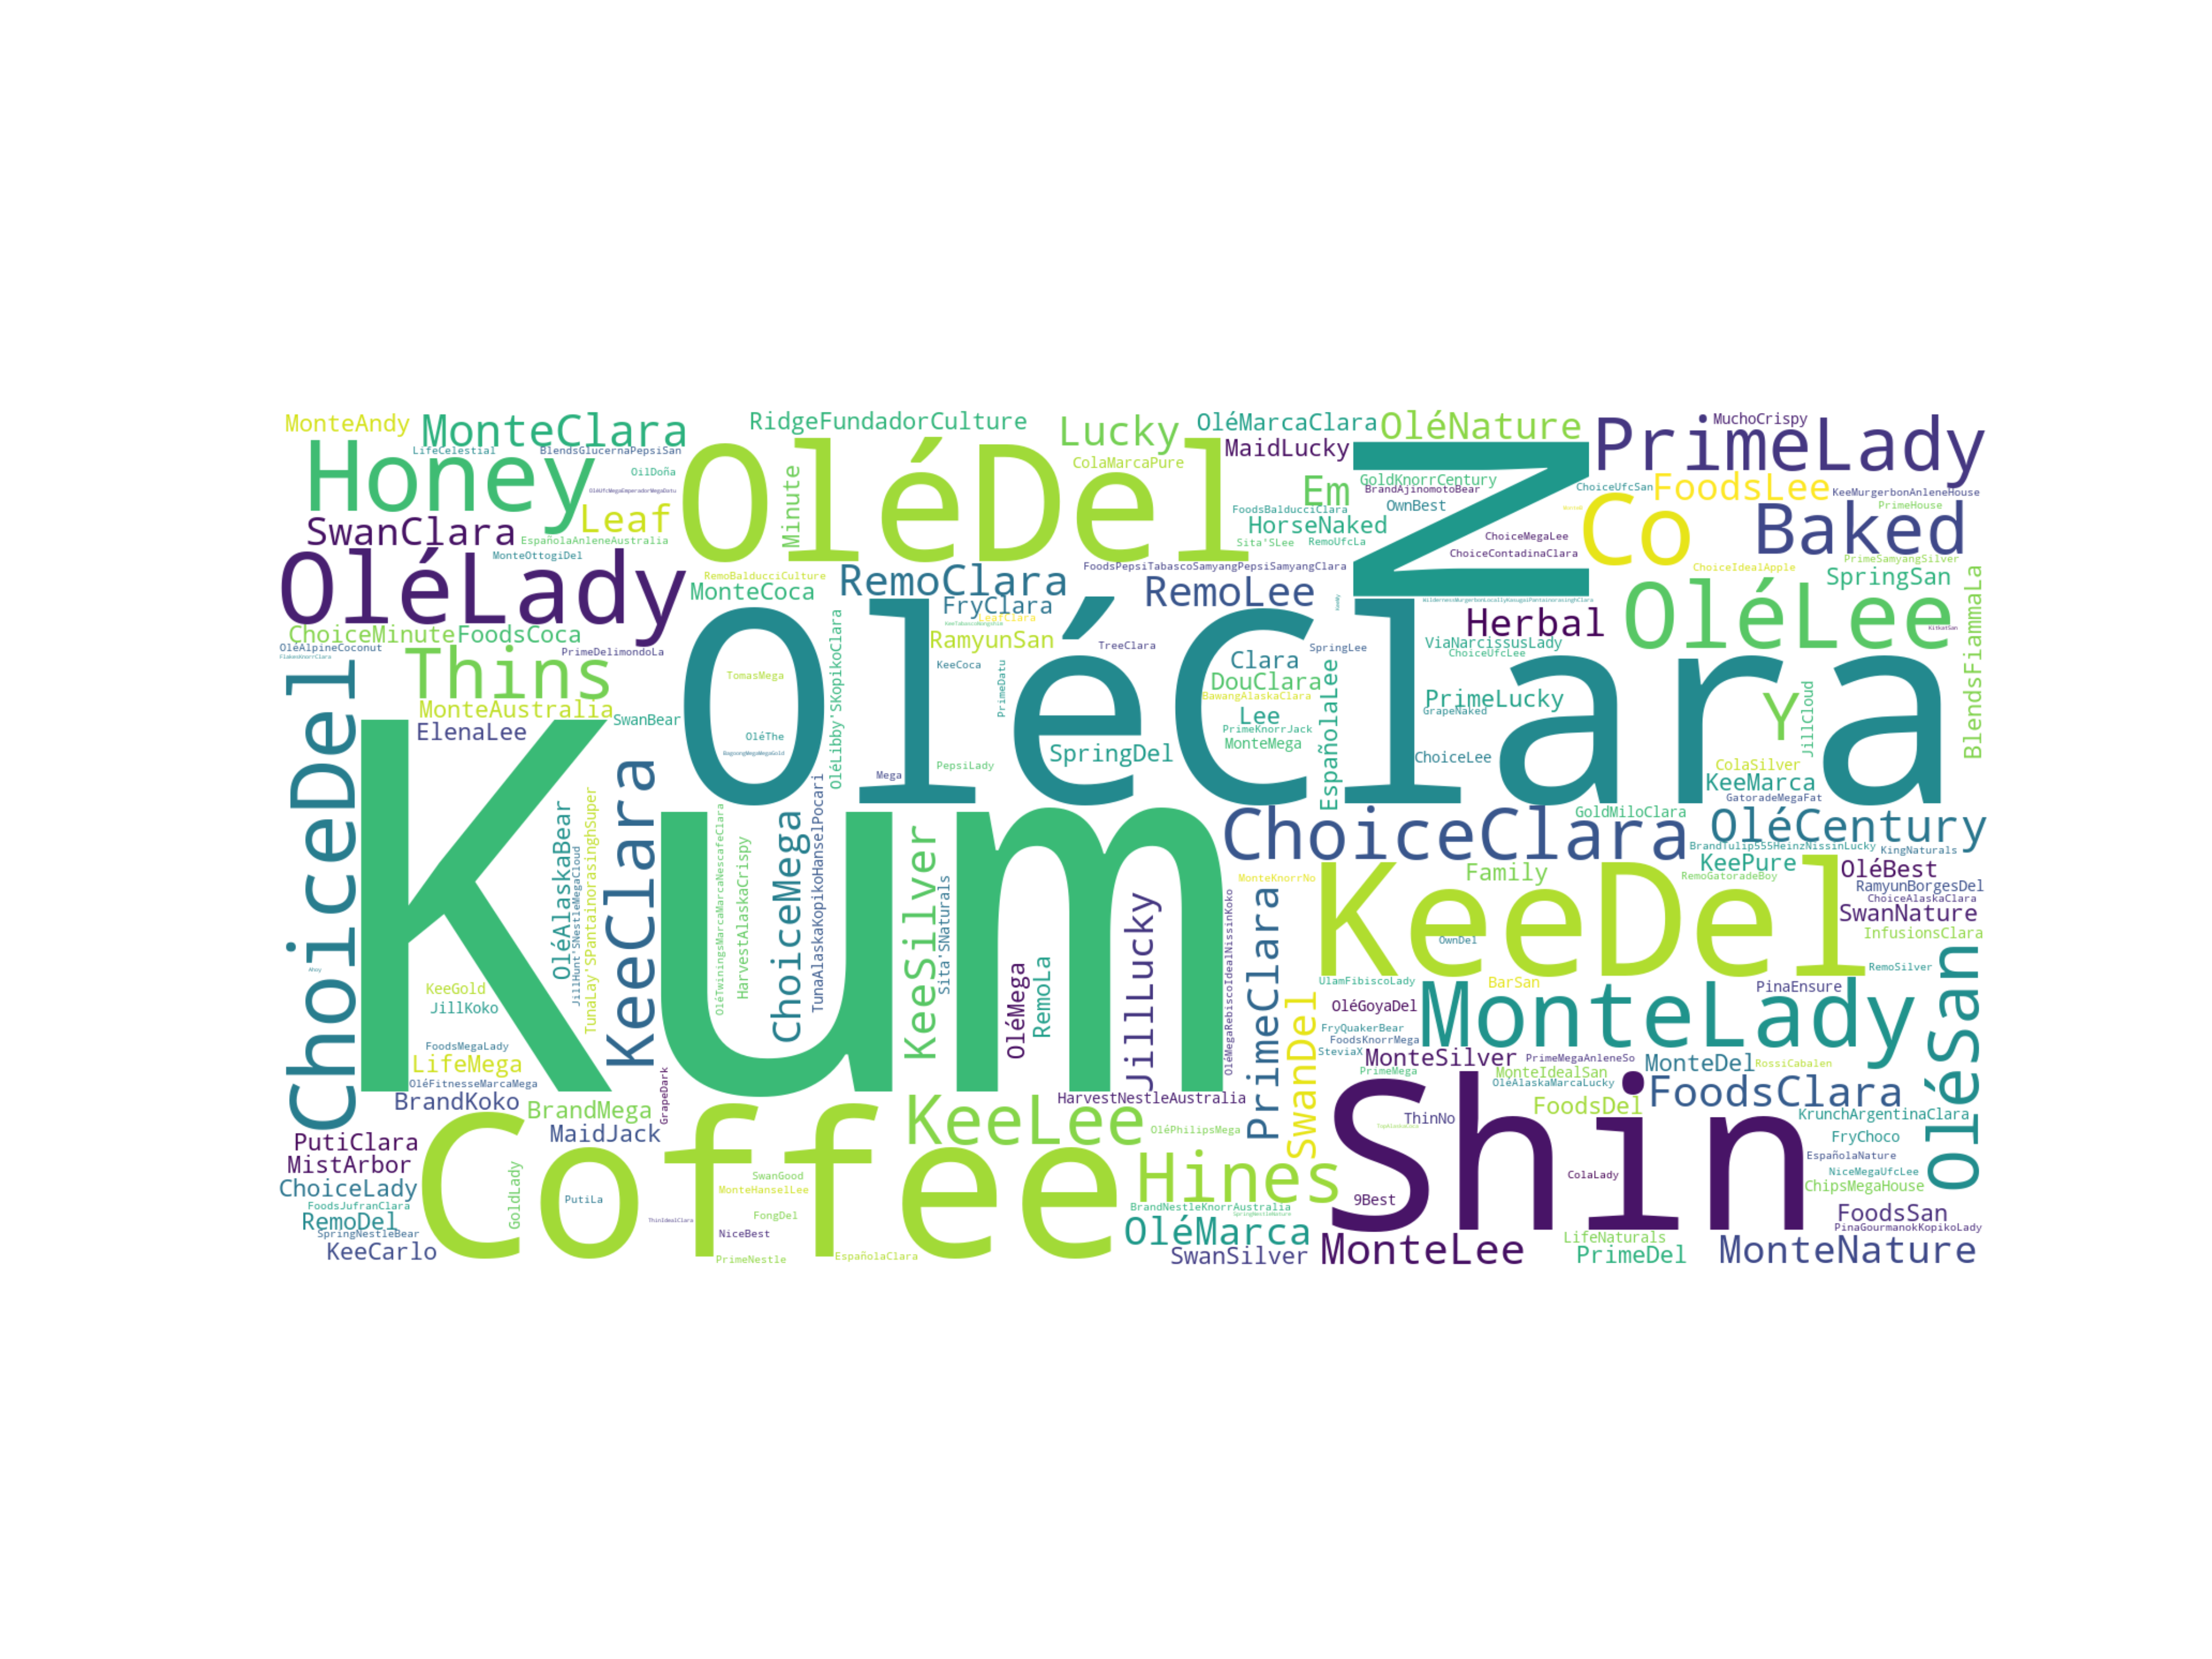

In [119]:
plt.figure(dpi=300)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

#### Correlation
---

In [15]:
import plydata.cat_tools as cat

num_feat = num_feat.drop(['status', 'item_page', 'views'], axis=1)

In [16]:
def plot_matrix(numerical_features: pd.DataFrame)\
    -> ggplot:
    
    # matrix correlation
    matrix_corr = numerical_features.corr()\
        .melt(ignore_index=False)\
        .reset_index()\
        .set_axis(labels=['var1', 'var2', 'value'], axis=1)\
        .assign(label_text=lambda x: np.round(x.value, 2))\
        .assign(var1=lambda x: cat.cat_inorder(x['var1']))\
        .assign(var2=lambda x: np.flip(cat.cat_inorder(x['var2'])))
    
    # ggplot 
    return ggplot(matrix_corr, aes('var1', 'var2', fill='value'))\
        + geom_tile()\
        + geom_label(aes(label='label_text'), fill='white', size=8)\
        + scale_fill_distiller()\
        + theme_minimal()\
        + labs(title='Correlation Matrix')\
        + theme(axis_text_x=element_text(rotation=45, hjust=1),
                figure_size=(8, 6))

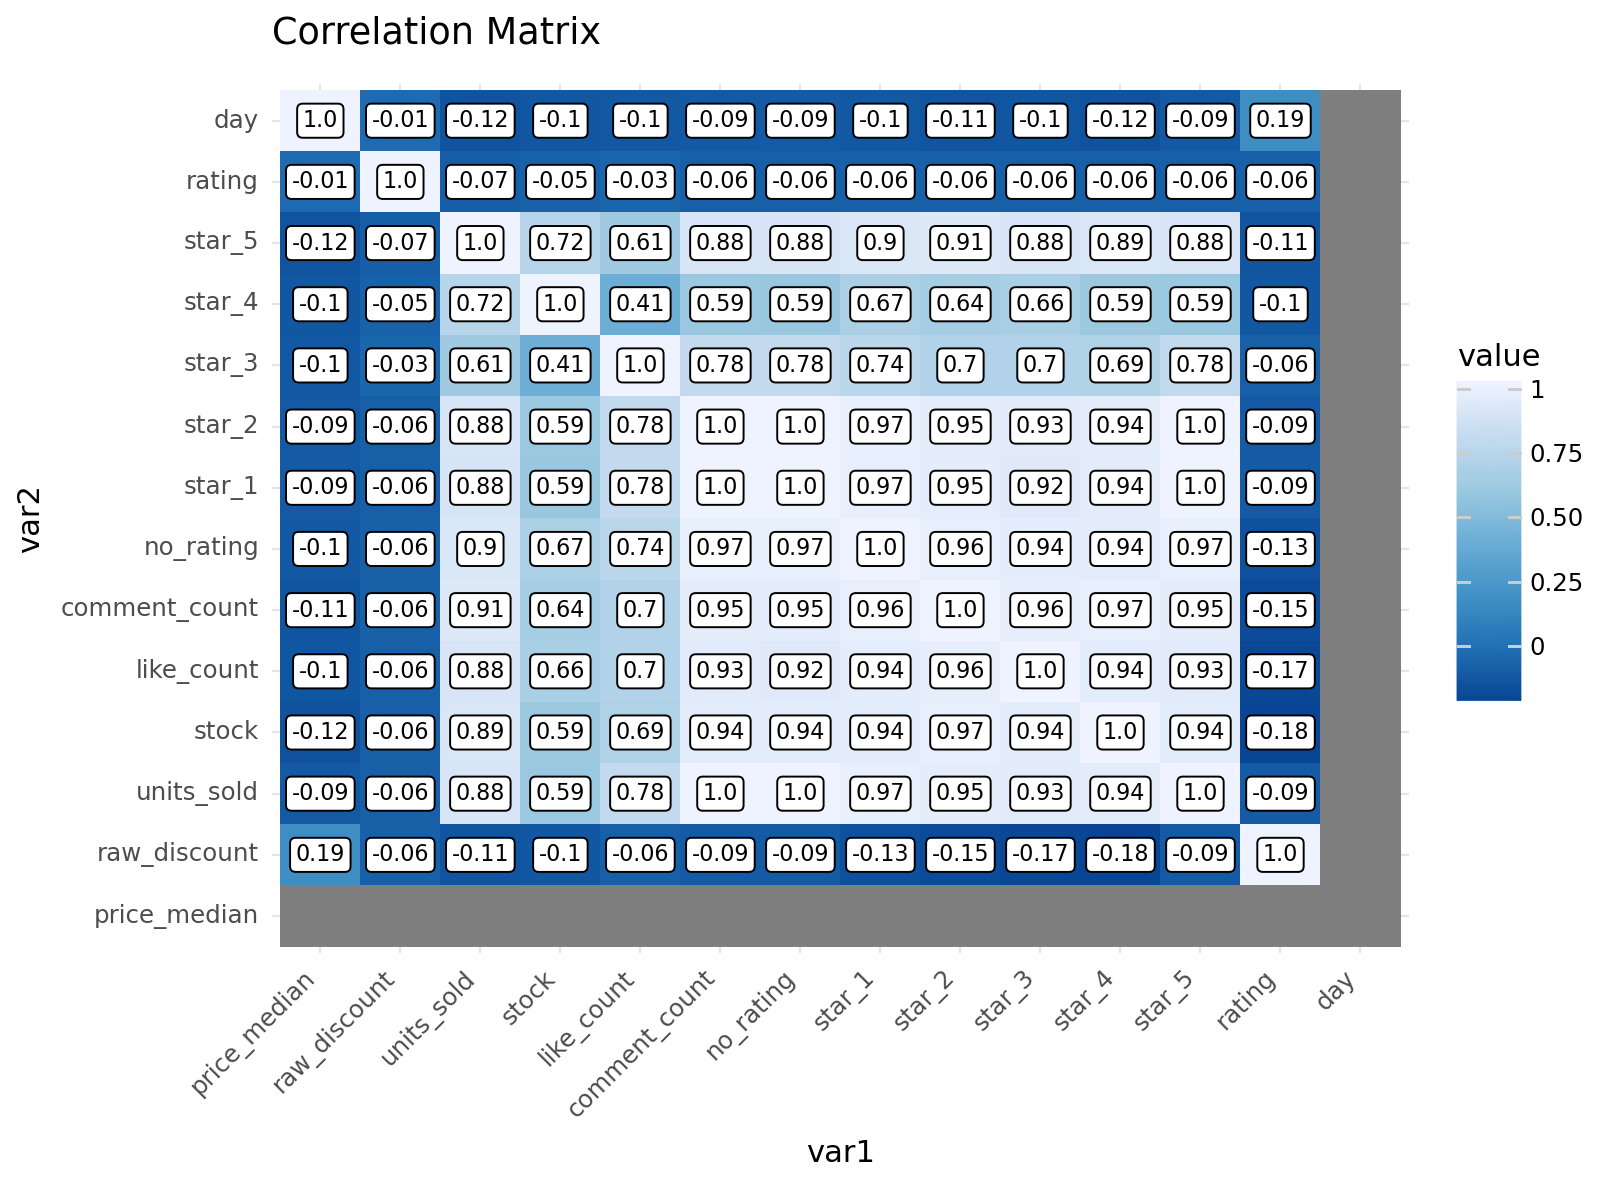

<Figure Size: (800 x 600)>

In [17]:
plot_matrix(num_feat)

#### Multicolinearity 

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a variance inlfation dataframe
vif = pd.DataFrame(num_feat.columns, columns=['feature'])

# check vif in our features
vif['vif_value'] = [variance_inflation_factor(num_feat, i) for i in range(len(num_feat.columns))]

# create new column to label vif > 5
vif['high'] = [vif.iloc[x][1] > 5 for x in range(0, vif.shape[0])]

In [19]:
# highly correlated features
high_corr_features = vif.filter_on('high == True').feature.to_list()
high_corr_features

['units_sold',
 'comment_count',
 'no_rating',
 'star_1',
 'star_2',
 'star_3',
 'star_4',
 'star_5',
 'day']

#### Numerical Distribution

---

In [20]:
# scale num features
num_feat_scaled = num_feat.min_max_scale().drop('day', axis=1)

# convert num features to long-format
melt_num_feat_scaled = pd.melt(num_feat_scaled)
melt_num_feat = pd.melt(num_feat)

In [21]:
melt_num_feat.variable.unique()

array(['price_median', 'raw_discount', 'units_sold', 'stock',
       'like_count', 'comment_count', 'no_rating', 'star_1', 'star_2',
       'star_3', 'star_4', 'star_5', 'rating', 'day'], dtype=object)

In [22]:
def plot_boxplot(features: list, title)\
    -> ggplot:
    return ggplot(melt_num_feat.filter_on(
        f'variable in {features}'), aes('variable', 'value'))\
        + geom_boxplot()\
        + theme(axis_text_x=element_text(rotation=45, hjust=1))\
        + labs(title=title)

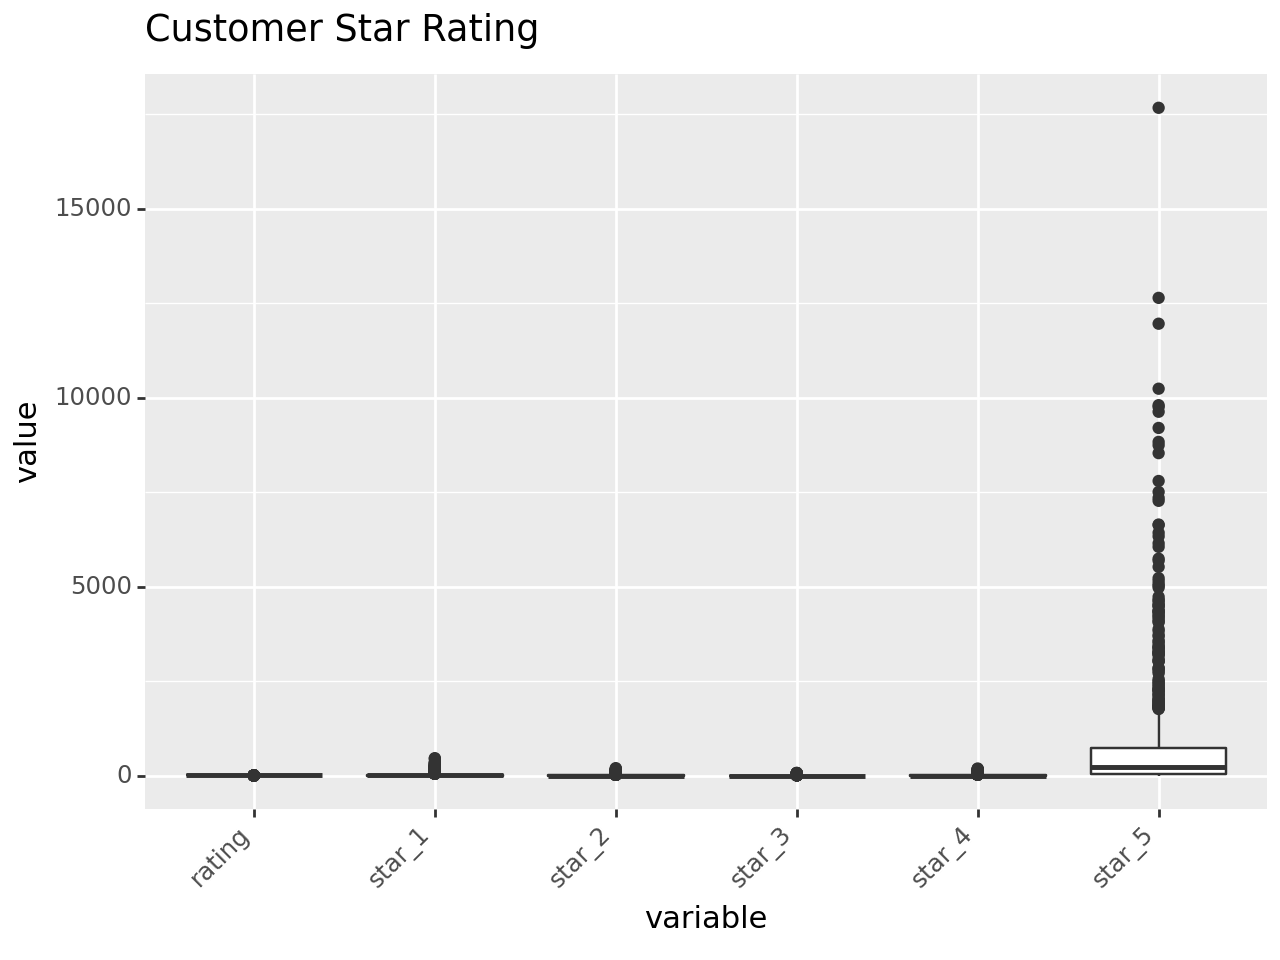

<Figure Size: (640 x 480)>

In [23]:
plot_boxplot(["star_1", "star_2", "star_3", "star_4", "star_5", "rating"],
            title="Customer Star Rating")

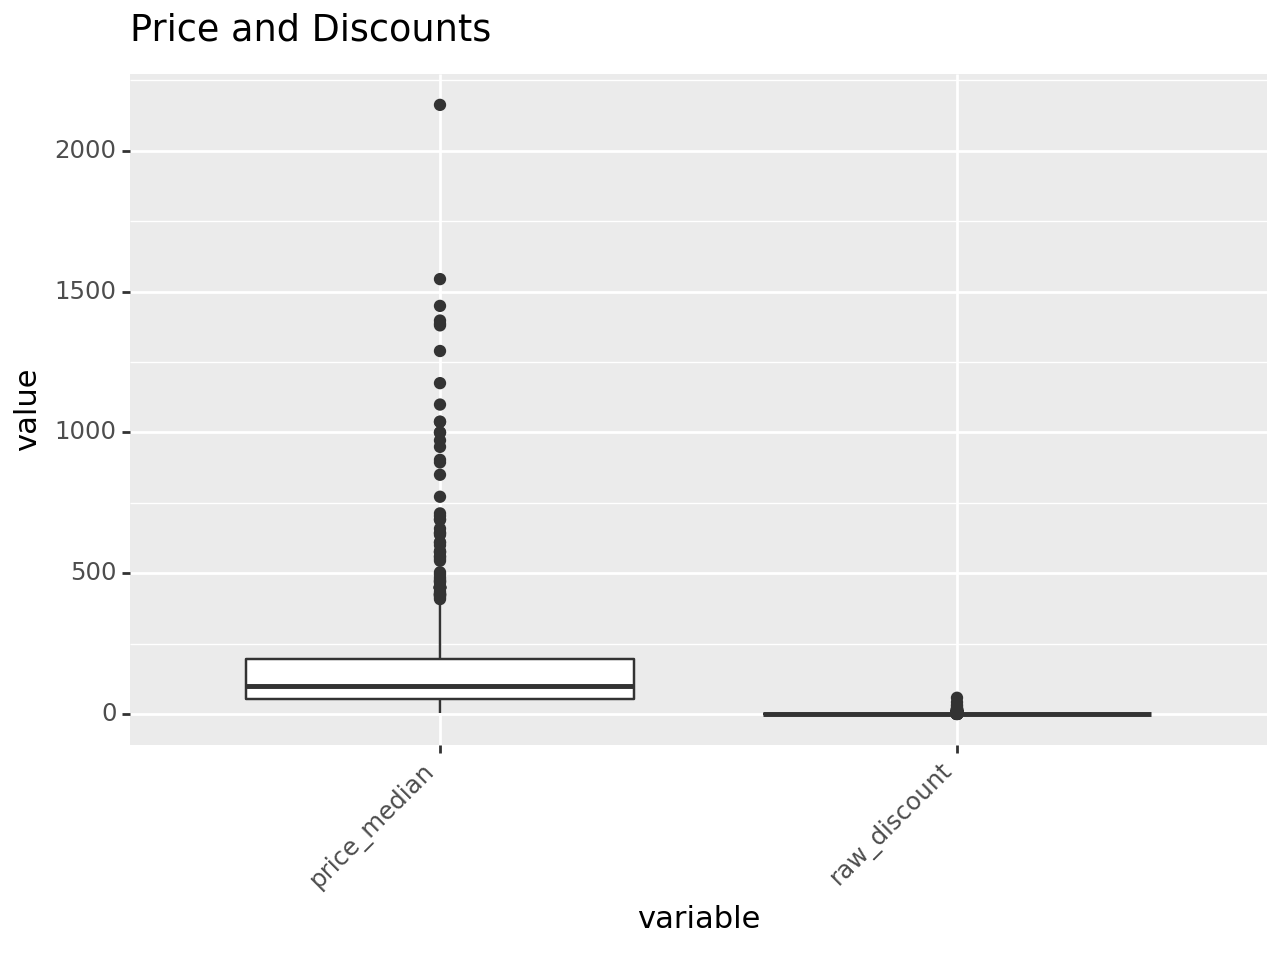

<Figure Size: (640 x 480)>

In [24]:
plot_boxplot(["price_median", "raw_discount"], title="Price and Discounts")

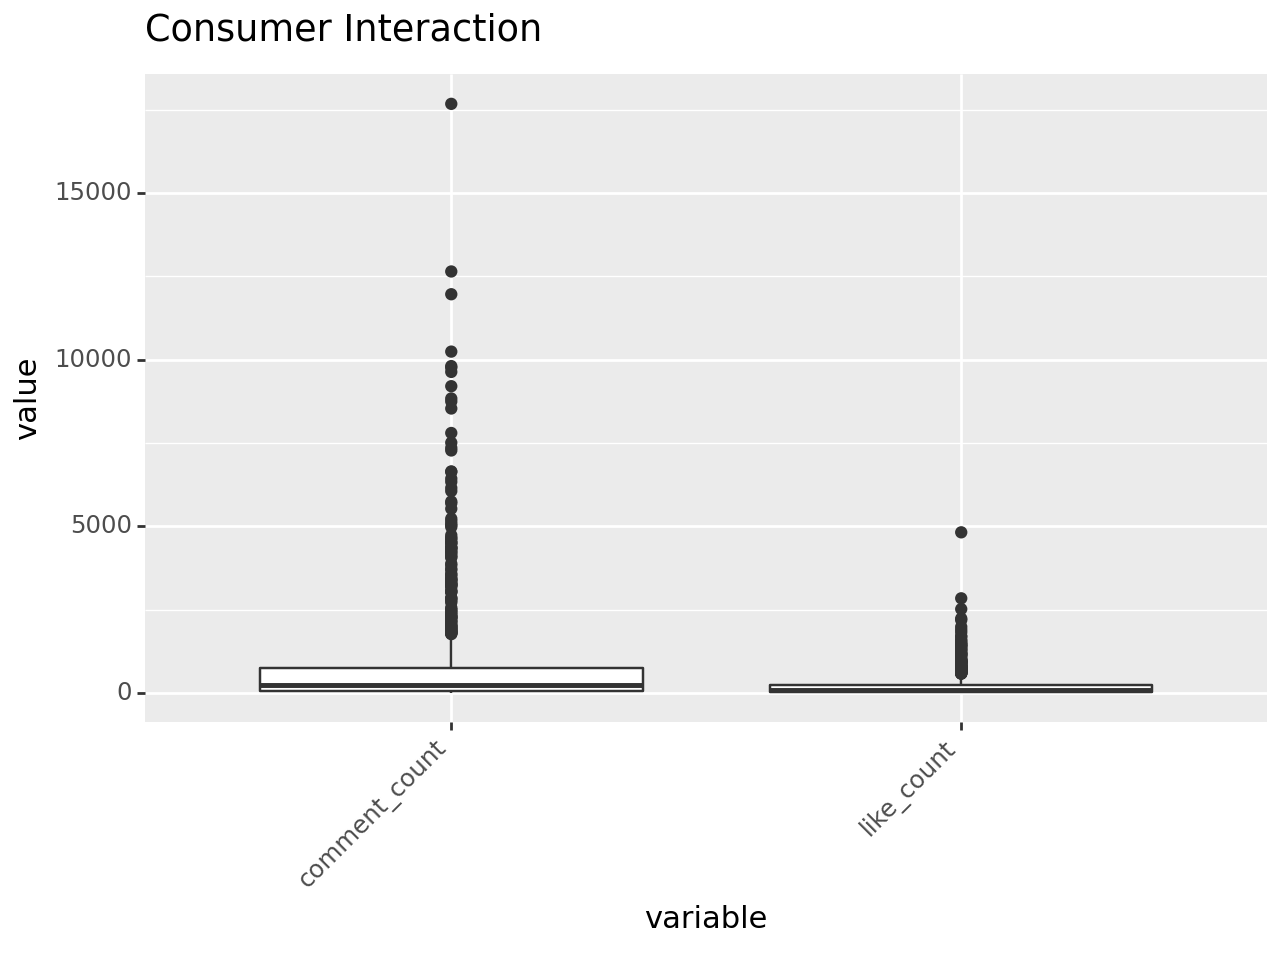

<Figure Size: (640 x 480)>

In [25]:
plot_boxplot(["like_count", "comment_count"], title='Consumer Interaction')

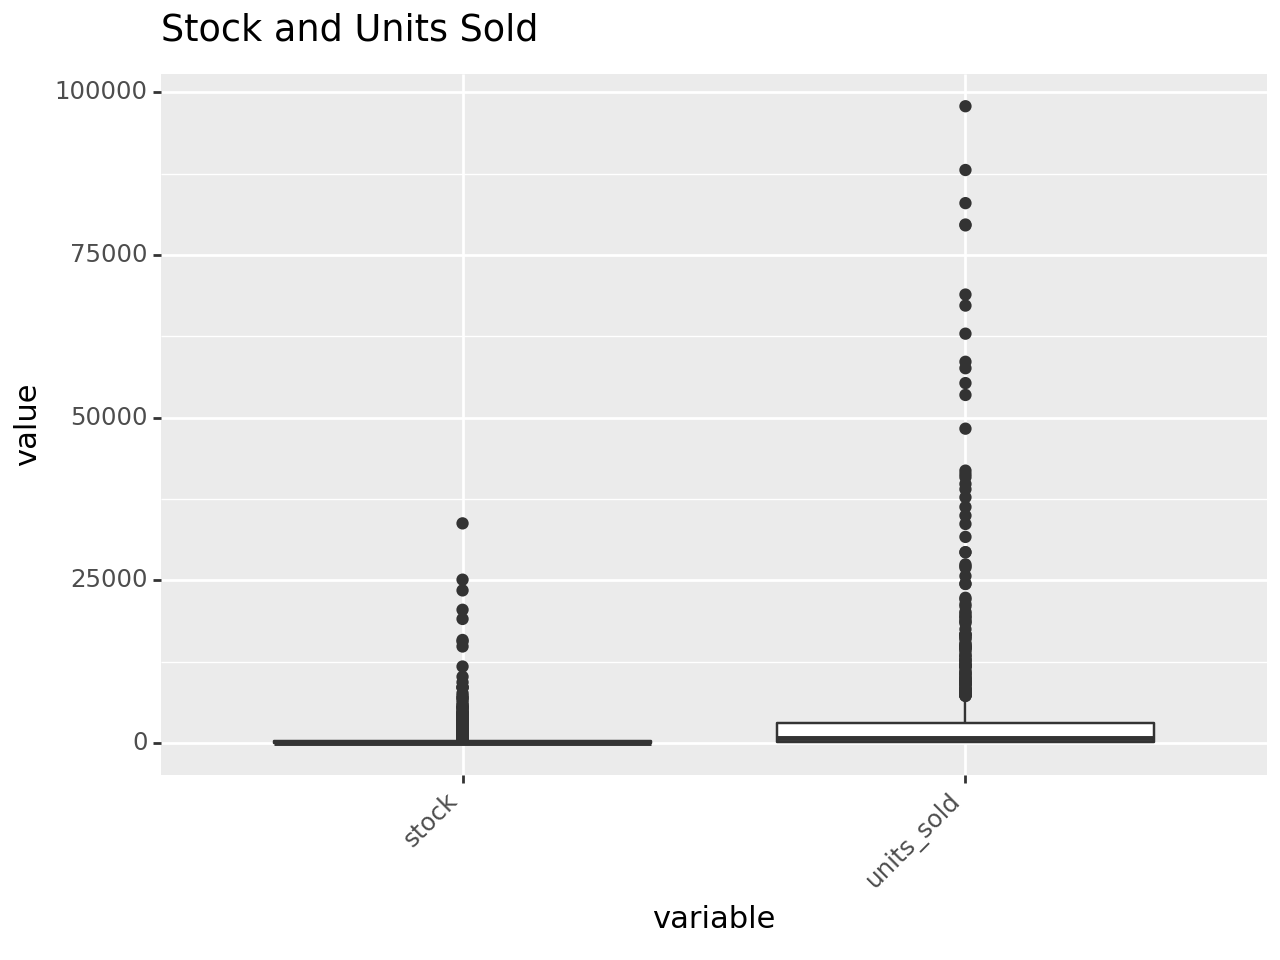

<Figure Size: (640 x 480)>

In [26]:
plot_boxplot(["units_sold", "stock"], "Stock and Units Sold")

#### Outlier detection

In [27]:
import patchworklib as pw
from sklearn.ensemble import IsolationForest

In [28]:
num_od = num_feat.drop('day', axis=1)

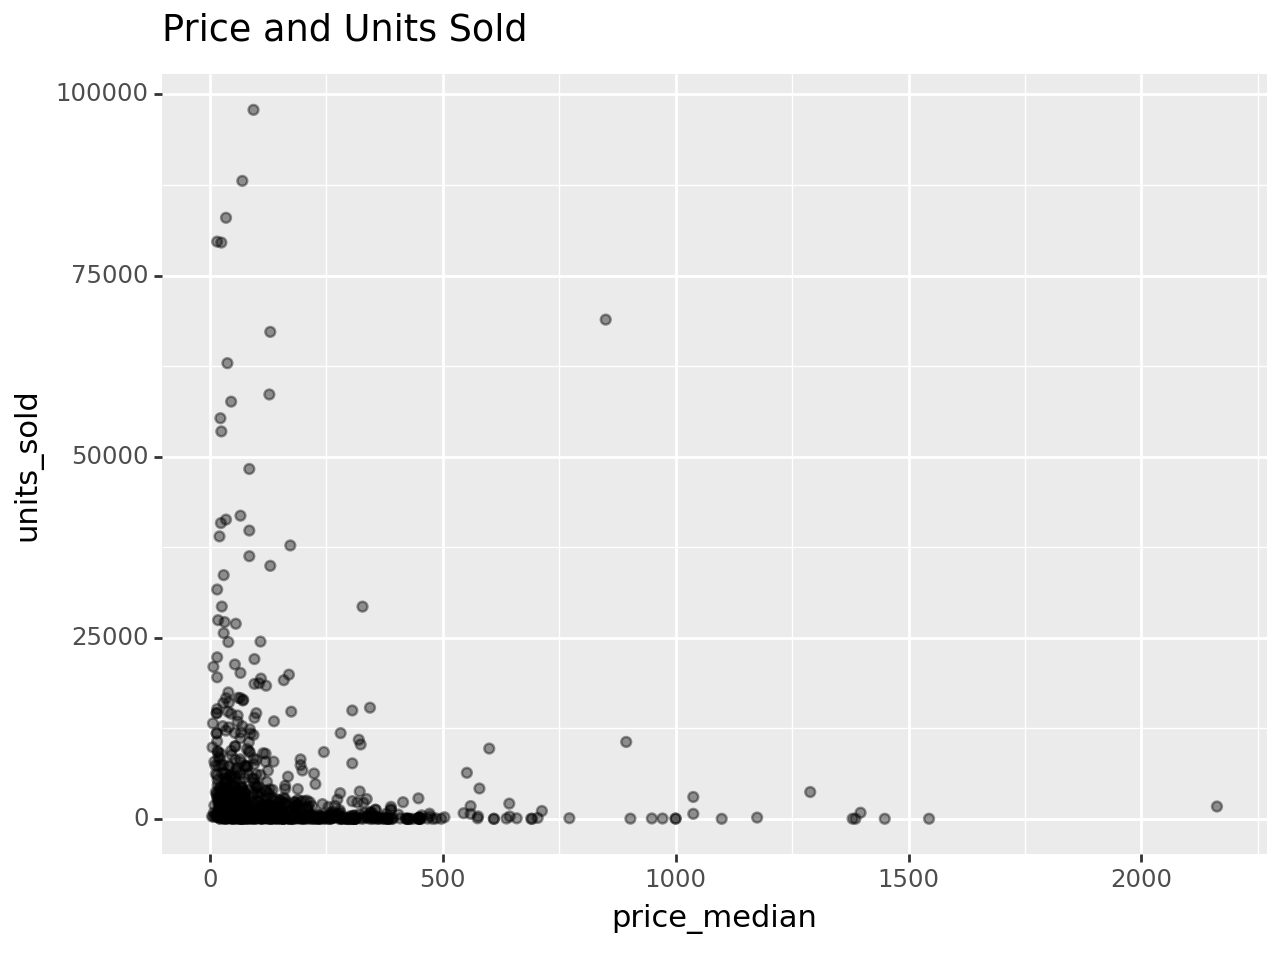

<Figure Size: (640 x 480)>

In [29]:
ggplot(num_od, aes('price_median', 'units_sold'))\
    + geom_point(alpha=.4)\
    + labs(title='Price and Units Sold')

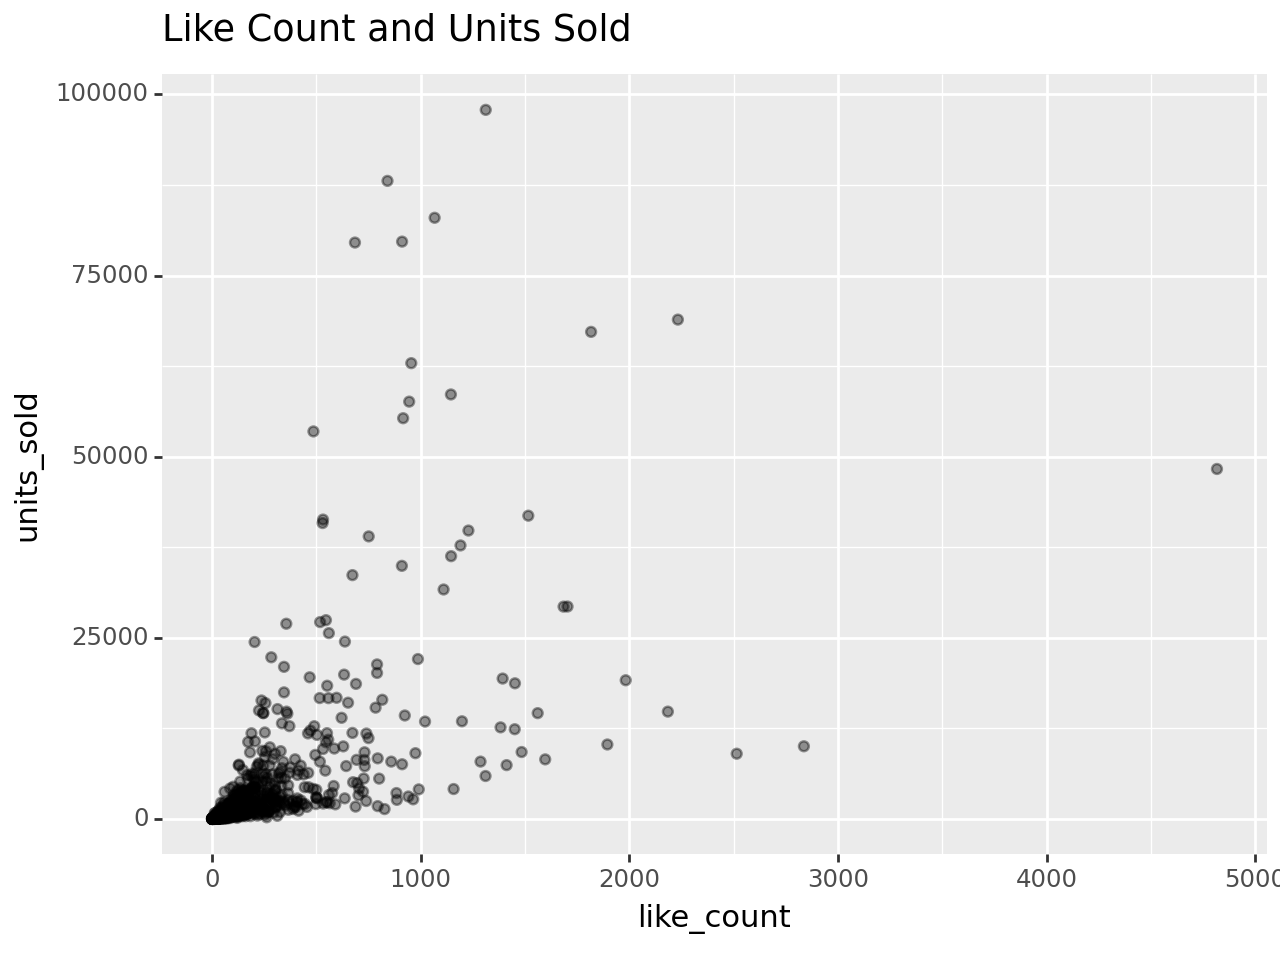

<Figure Size: (640 x 480)>

In [30]:
ggplot(num_od, aes('like_count', 'units_sold'))\
    + geom_point(alpha=.4)\
    + labs(title='Like Count and Units Sold')

In [31]:
# fit and predict isolation forest model
iso = IsolationForest().fit_predict(num_od)
params = {'contamination': [.05, .1, .2, .3, .4, .5]}

In [32]:
def run_isolation_cont(df, params)\
    -> list:
    """
     Creates a list of ggplot scatter plot with the x features as input with contamination
    parameters for IsolationForest increasing from .1 to .5
    :returns: A list of ggplot scatter with different contamination levels.
    :rtype: list.
    """
    # fit and predict isolation forest model
    
    
    x = df.copy()
    
    od_models = []
    for values in params.get('contamination'):
        
        iso = IsolationForest(contamination=values).fit_predict(x)
        outlier_index = np.where(iso < 0)
        num_od = x.assign(outlier_iso=0)
        num_od.outlier_iso.iloc[outlier_index, ...] = 1
        

        od_models.append(num_od)
    
    return od_models

In [33]:
# iso_plot = run_isolation_cont(num_od)
# patches = [pw.load_ggplot(x, figsize=(4,6)) for x in iso_plot]
# (patches[0] | patches[1] | patches[2] | patches[3])

In [34]:
iso_models_df = run_isolation_cont(num_od, params)

In [35]:
num_feat

price_median  raw_discount  units_sold  stock  like_count  comment_count  \
0              94             0       97861   6613        1312           9630   
1              70             0       88058   7246         841           7273   
2              35             0       82968   4163        1067           9804   
3              25             4       79548  33747         685           6332   
4              16             0       79678  23444         911           5524   
..            ...           ...         ...    ...         ...            ...   
893            57             0         597     36          89            163   
894           135            10         276      7          89            103   
895           450             0         146     22          65             38   
896            40             0         432     88          43            153   
897            40             0         126     16          10             26   

     no_rating  star_1  star_2  star_3  star_4  star_5  rating  day  
0         9073     303     117      37     100    9630    4.89   31  
1         6810     249      98      31      85    7273    4.88   31  
2         9133     298     162      54     157    9804    4.86   31  
3         5823     228     117      58     107    6333    4.84   31  
4         4847     363     131      73     111    5525    4.77   31  
..         ...     ...     ...     ...     ...     ...     ...  ...  
893        156       5       0       0       2     163    4.92   31  
894         98       2       3       0       0     103    4.92   31  
895         37       0       0       1       0      38    4.92   31  
896        147       3       1       1       1     153    4.92   31  
897         24       2       0       0       0      26    4.92   31  

[898 rows x 14 columns]

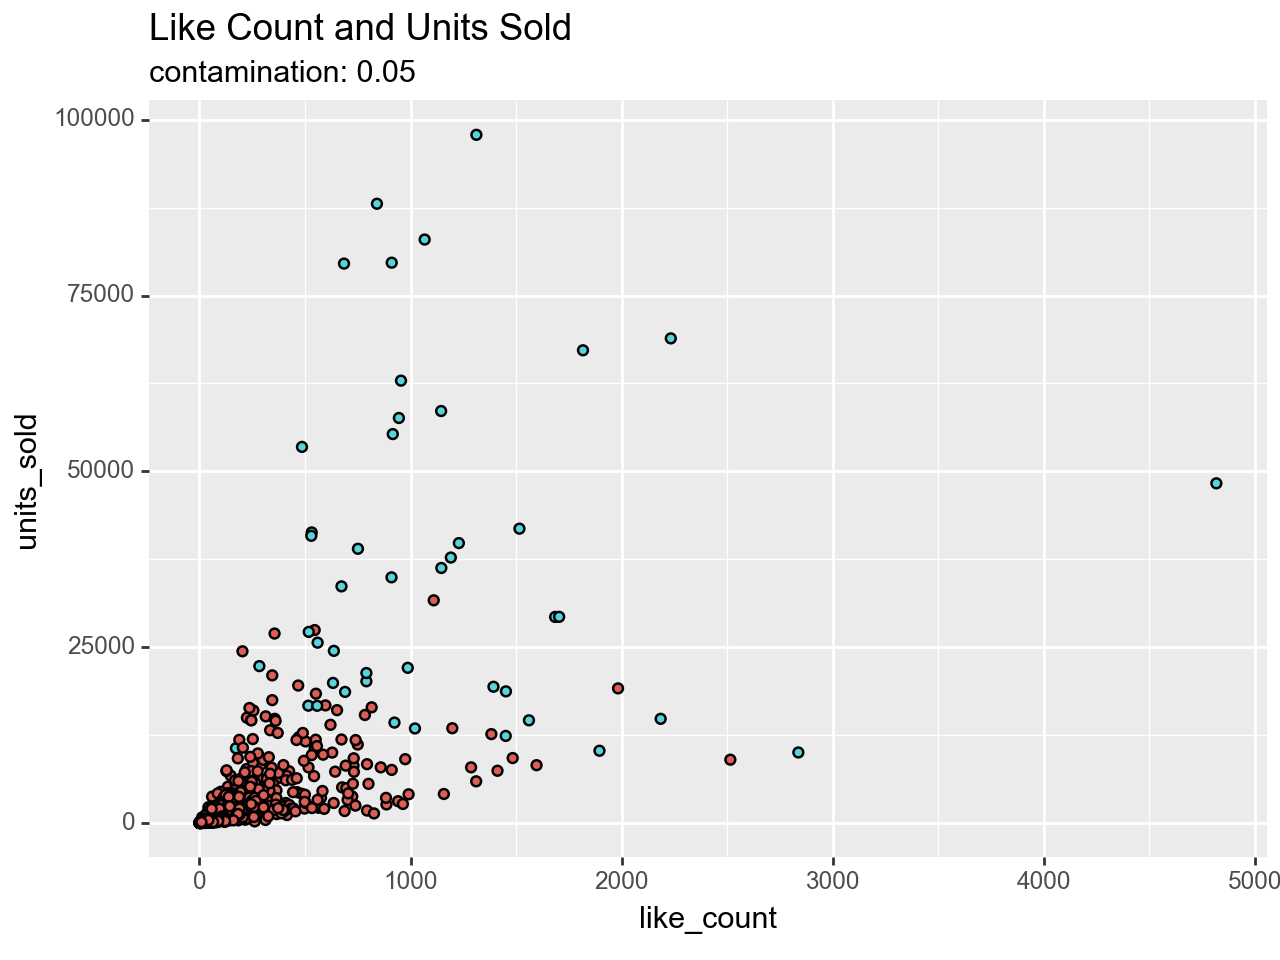

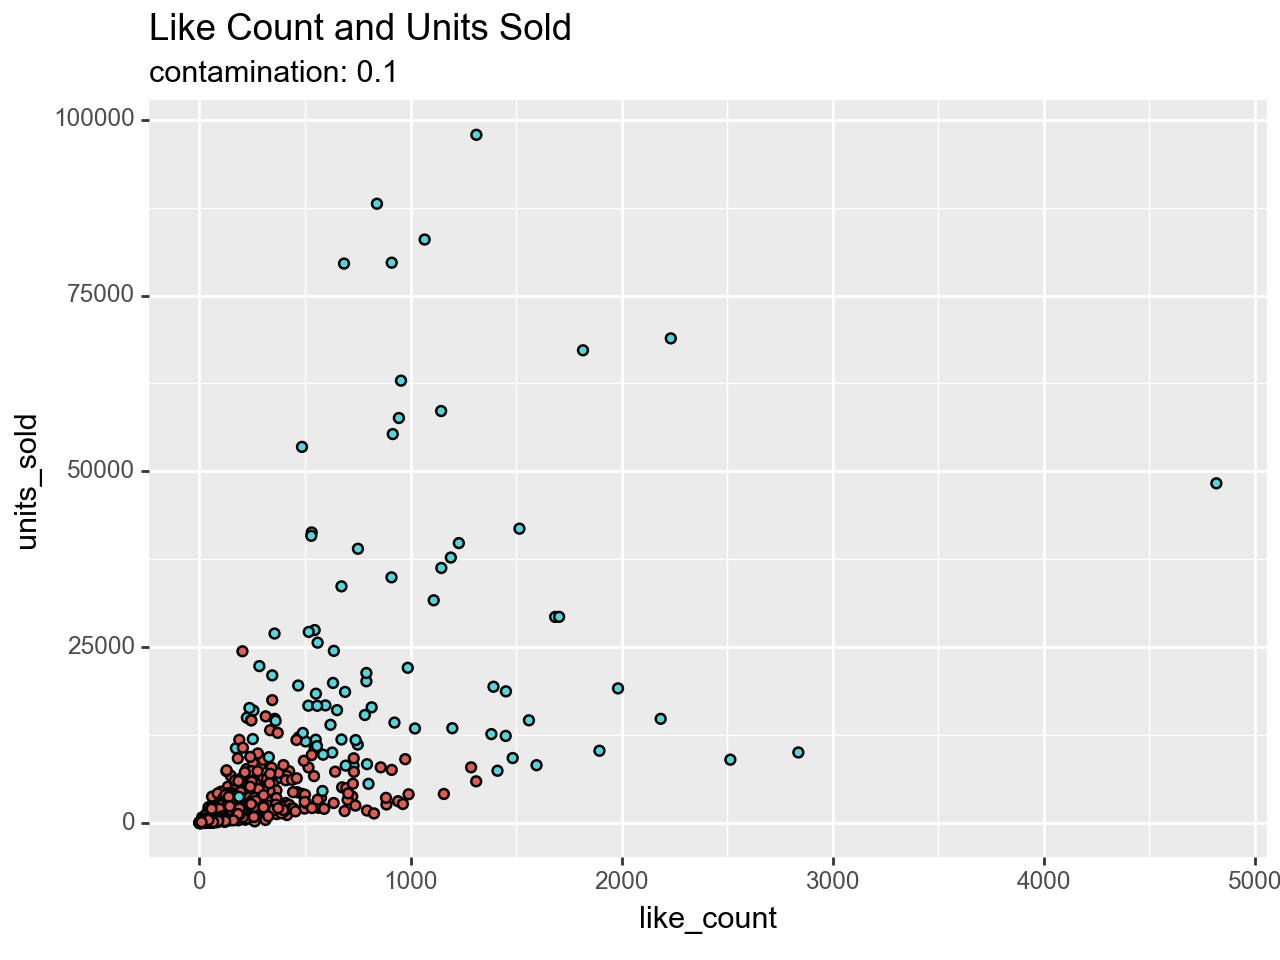

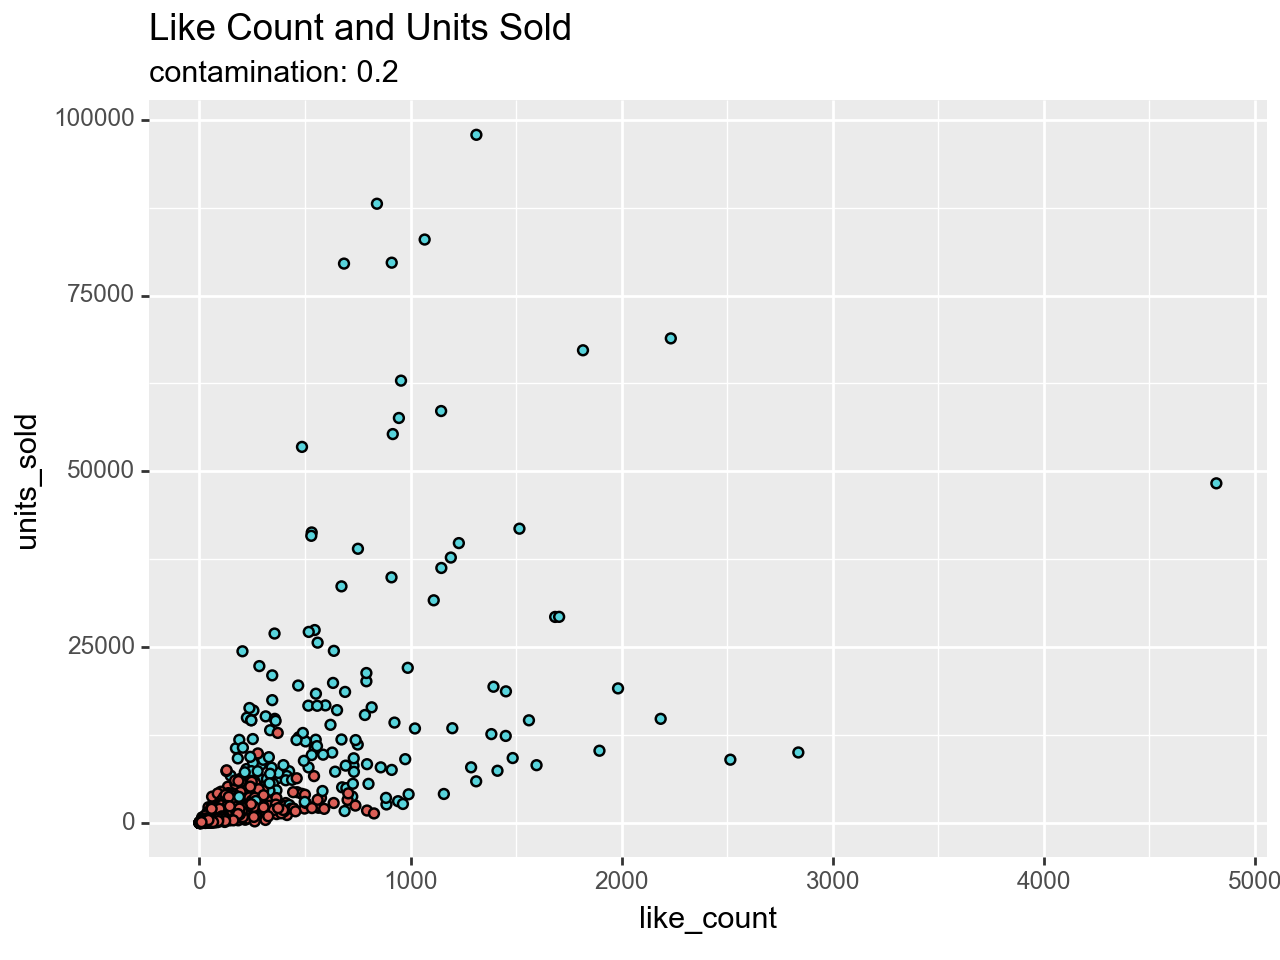

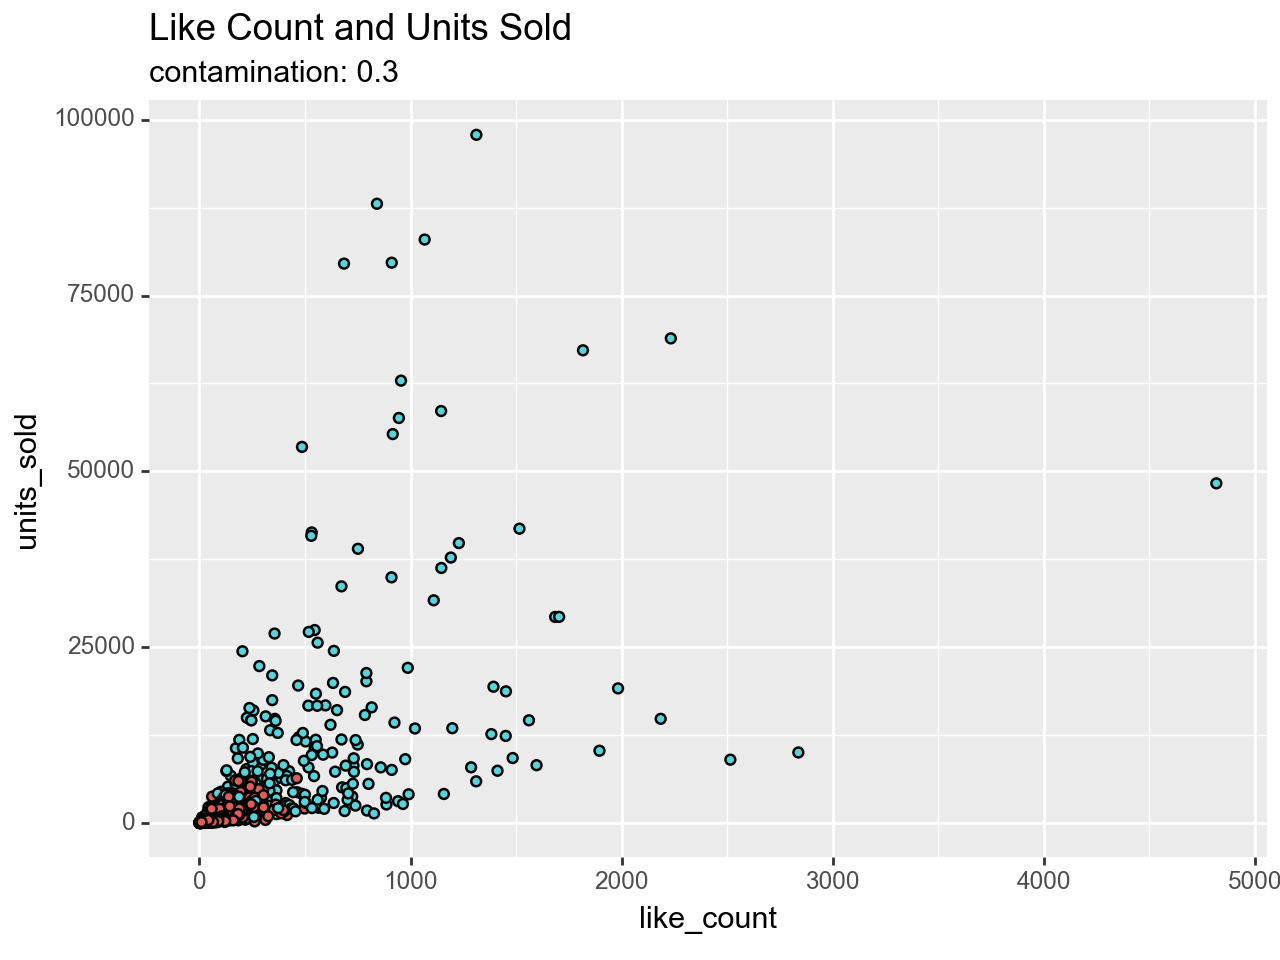

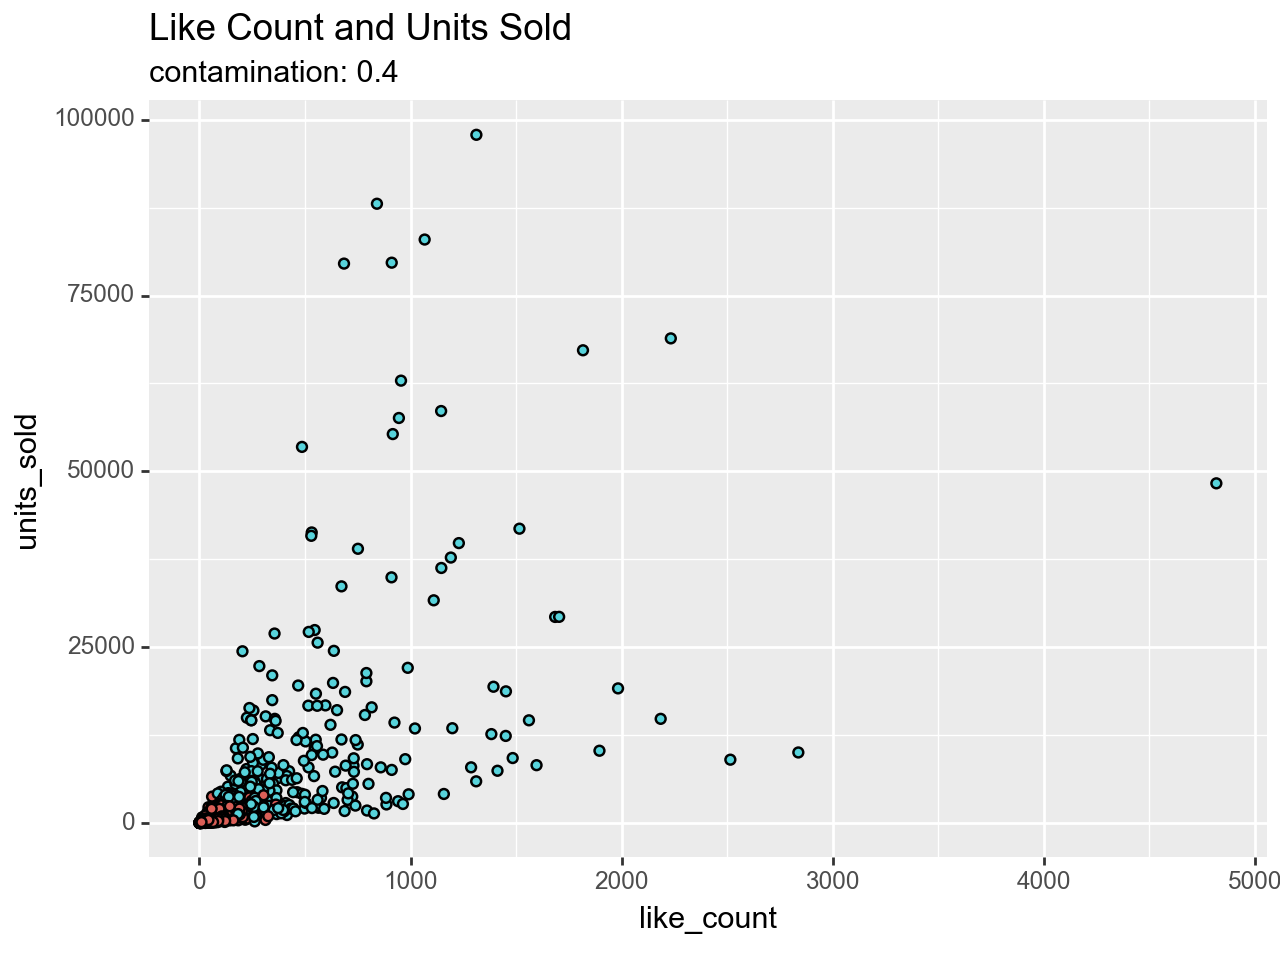

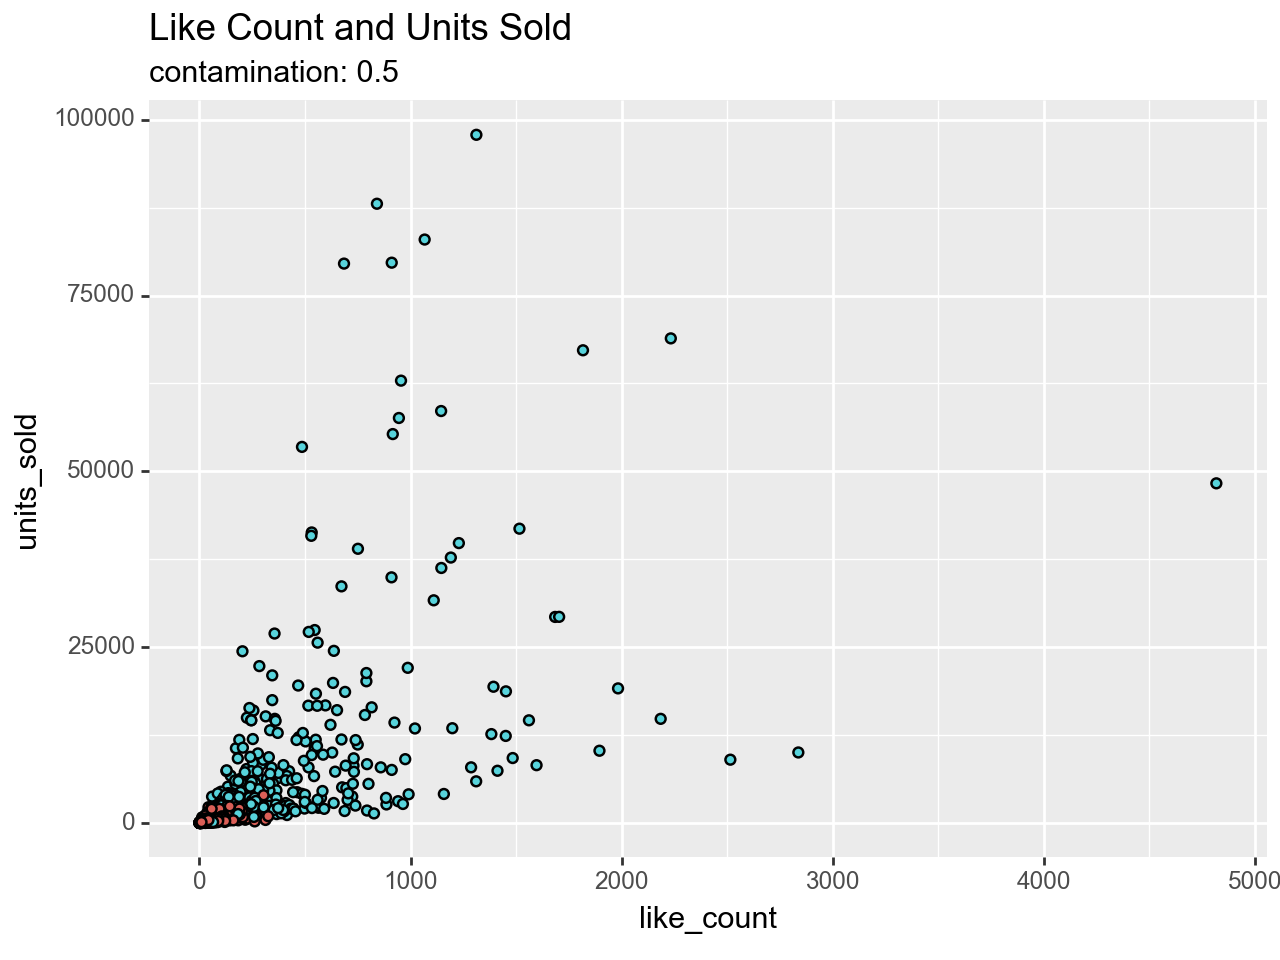

In [36]:
for df, levels in zip(iso_models_df, params.get('contamination')):
    plot = (ggplot(df, aes('like_count', 'units_sold', fill='factor(outlier_iso)'))\
        + geom_point()\
        # + facet_wrap('~outlier_iso')\
        + labs(title='Like Count and Units Sold', subtitle=f'contamination: {levels}')\
        + theme(legend_position='none')).draw();
    display(plot)

In [37]:
outlier_index = np.where(iso < 0)
num_od = num_od.assign(outlier_iso=0)
num_od.outlier_iso.iloc[outlier_index, ...] = 1

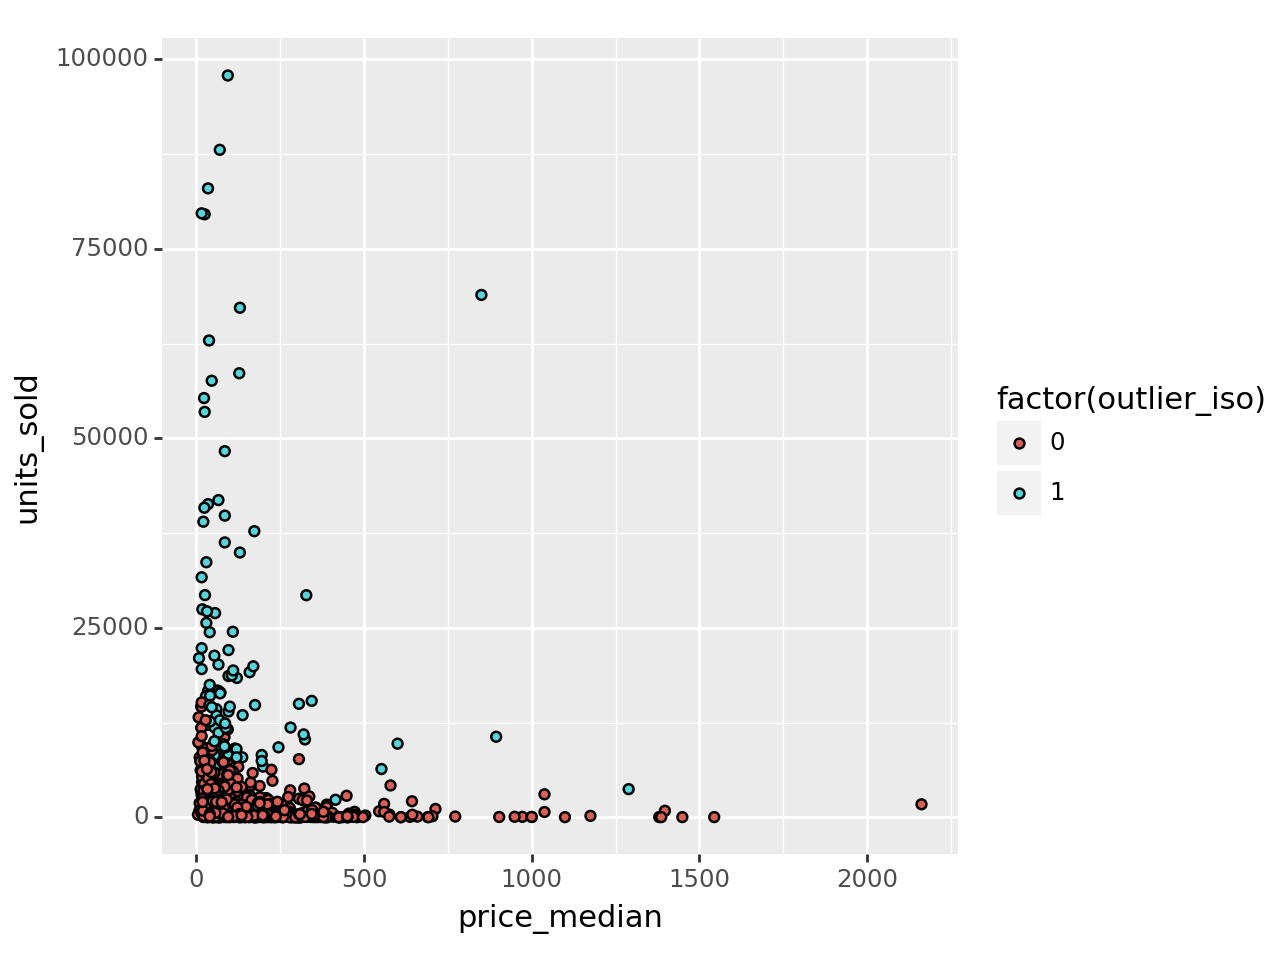

<Figure Size: (640 x 480)>

In [38]:
ggplot(num_od, aes('price_median', 'units_sold', fill='factor(outlier_iso)'))\
    + geom_point()

#### Preparing features for Uns. ML

In [39]:
# select name of star feat
star_ratings = [i for i in num_feat.columns if i.startswith('star')]
for i in ['price_median', 'raw_discount', 'units_sold', 'like_count', 'rating', 'comment_count']:
    star_ratings.append(i) 
    

# # get star/rating features
star_df = num_feat[star_ratings]

# scale features for viz
scaled_star_df = star_df.min_max_scale()

# kmeans evaluation
num_clusters = [i for i in range(2, 8)]

# inertia & silhouette score
inertia = kmeans_inertia(num_clusters, scaled_star_df)
sil_score = kmeans_sil(num_clusters, scaled_star_df)

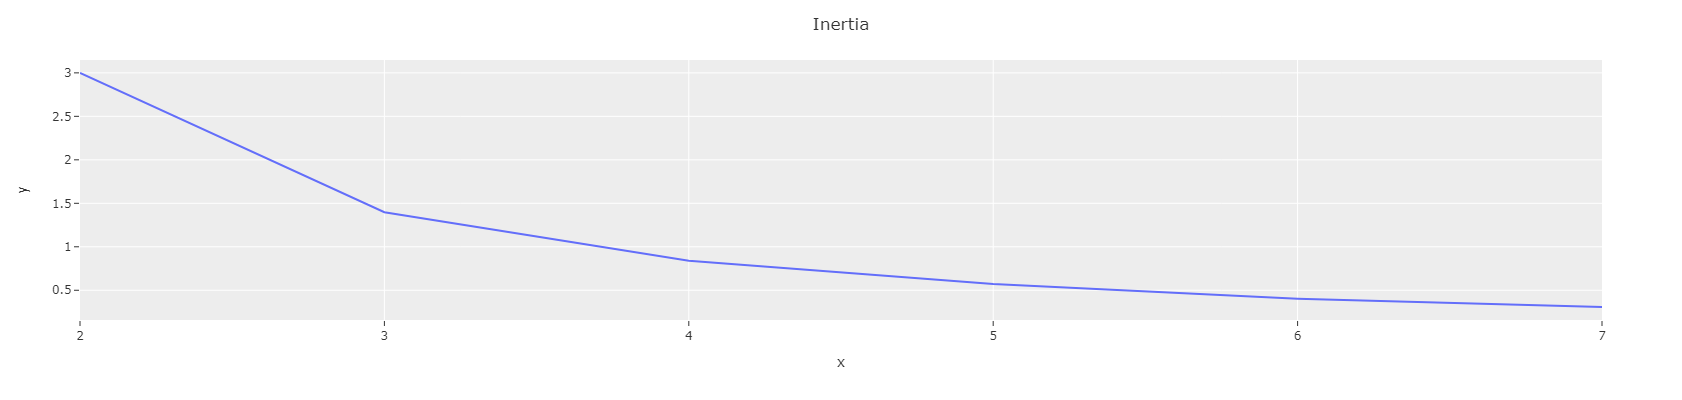

In [40]:
plot_kmeans_test(num_clusters, inertia, 'Inertia', plot_params)

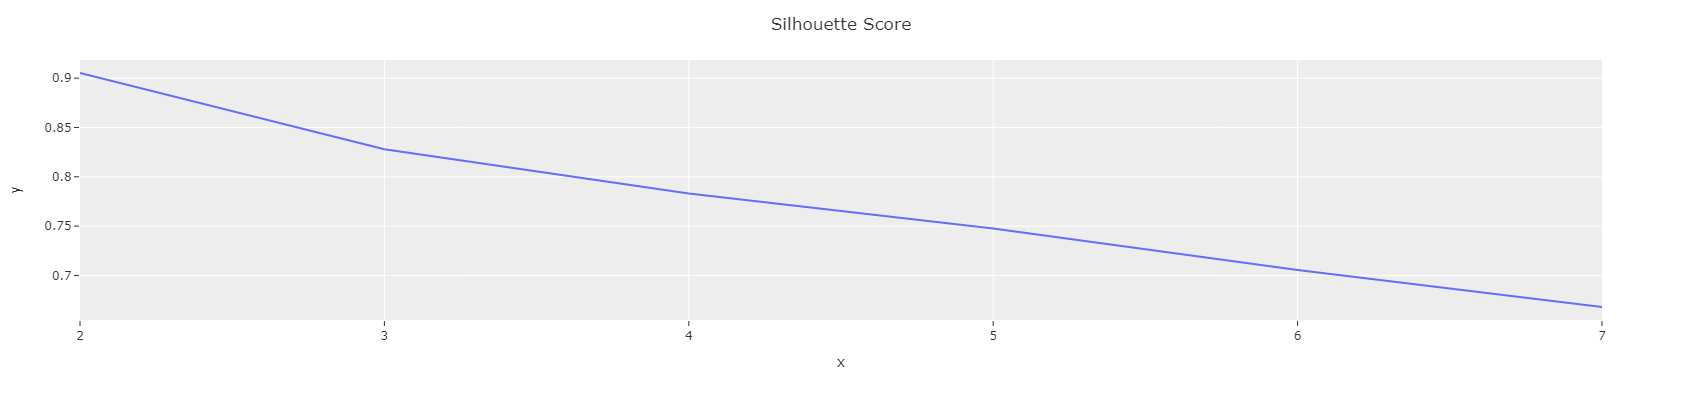

In [41]:
plot_kmeans_test(num_clusters, sil_score, 'Silhouette Score', plot_params)

In [42]:
# kmeans of 4 clusters silhouette score = .97, inertia=6.29
kmeans_rating = KMeans(n_clusters=4, random_state=42).fit(scaled_star_df)

# get and concat labels
scaled_star_df['labels'] = kmeans_rating.labels_

In [43]:
scaled_star_df

star_1    star_2    star_3    star_4    star_5  price_median  \
0    0.003096  0.001196  0.000378  0.001022  0.098405      0.000961   
1    0.002544  0.001001  0.000317  0.000869  0.074320      0.000715   
2    0.003045  0.001655  0.000552  0.001604  0.100183      0.000358   
3    0.002330  0.001196  0.000593  0.001093  0.064714      0.000255   
4    0.003709  0.001339  0.000746  0.001134  0.056458      0.000163   
..        ...       ...       ...       ...       ...           ...   
893  0.000051  0.000000  0.000000  0.000020  0.001666      0.000582   
894  0.000020  0.000031  0.000000  0.000000  0.001053      0.001380   
895  0.000000  0.000000  0.000010  0.000000  0.000388      0.004598   
896  0.000031  0.000010  0.000010  0.000010  0.001563      0.000409   
897  0.000020  0.000000  0.000000  0.000000  0.000266      0.000409   

     raw_discount  units_sold  like_count    rating  comment_count  labels  
0        0.000000    1.000000    0.013407  0.000050       0.098405       1  
1        0.000000    0.899827    0.008594  0.000050       0.074320       1  
2        0.000000    0.847815    0.010903  0.000050       0.100183       1  
3        0.000041    0.812867    0.007000  0.000049       0.064704       1  
4        0.000000    0.814196    0.009309  0.000049       0.056447       1  
..            ...         ...         ...       ...            ...     ...  
893      0.000000    0.006100    0.000909  0.000050       0.001666       0  
894      0.000102    0.002820    0.000909  0.000050       0.001053       0  
895      0.000000    0.001492    0.000664  0.000050       0.000388       0  
896      0.000000    0.004414    0.000439  0.000050       0.001563       0  
897      0.000000    0.001288    0.000102  0.000050       0.000266       0  

[898 rows x 12 columns]

Within our clusters we're seeing 4 categories of sales in the food & beverage category. <br>
- low units sold and lower like count 
- low units sold and below average like count
- 


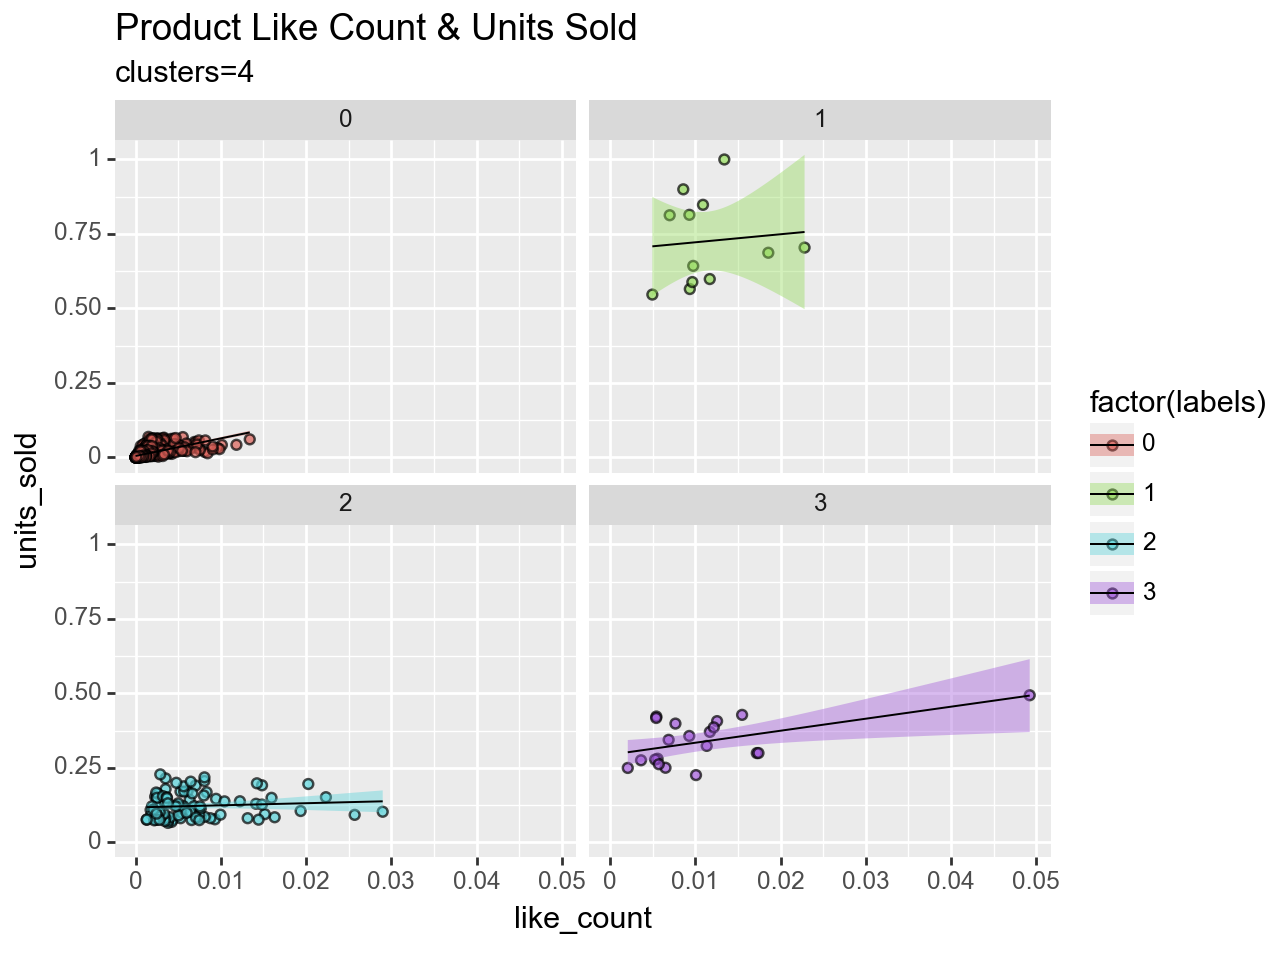

In [44]:
# visualize clusters
cluster_viz_1 = (ggplot(scaled_star_df, aes('like_count', 'units_sold', fill='factor(labels)'))\
    + geom_point(alpha=.7)\
    + geom_smooth(method='lm', size=.4, color='black')
    + labs(title='Product Like Count & Units Sold', subtitle='clusters=4')\
    + facet_wrap('~labels')).draw();

cluster_viz_1

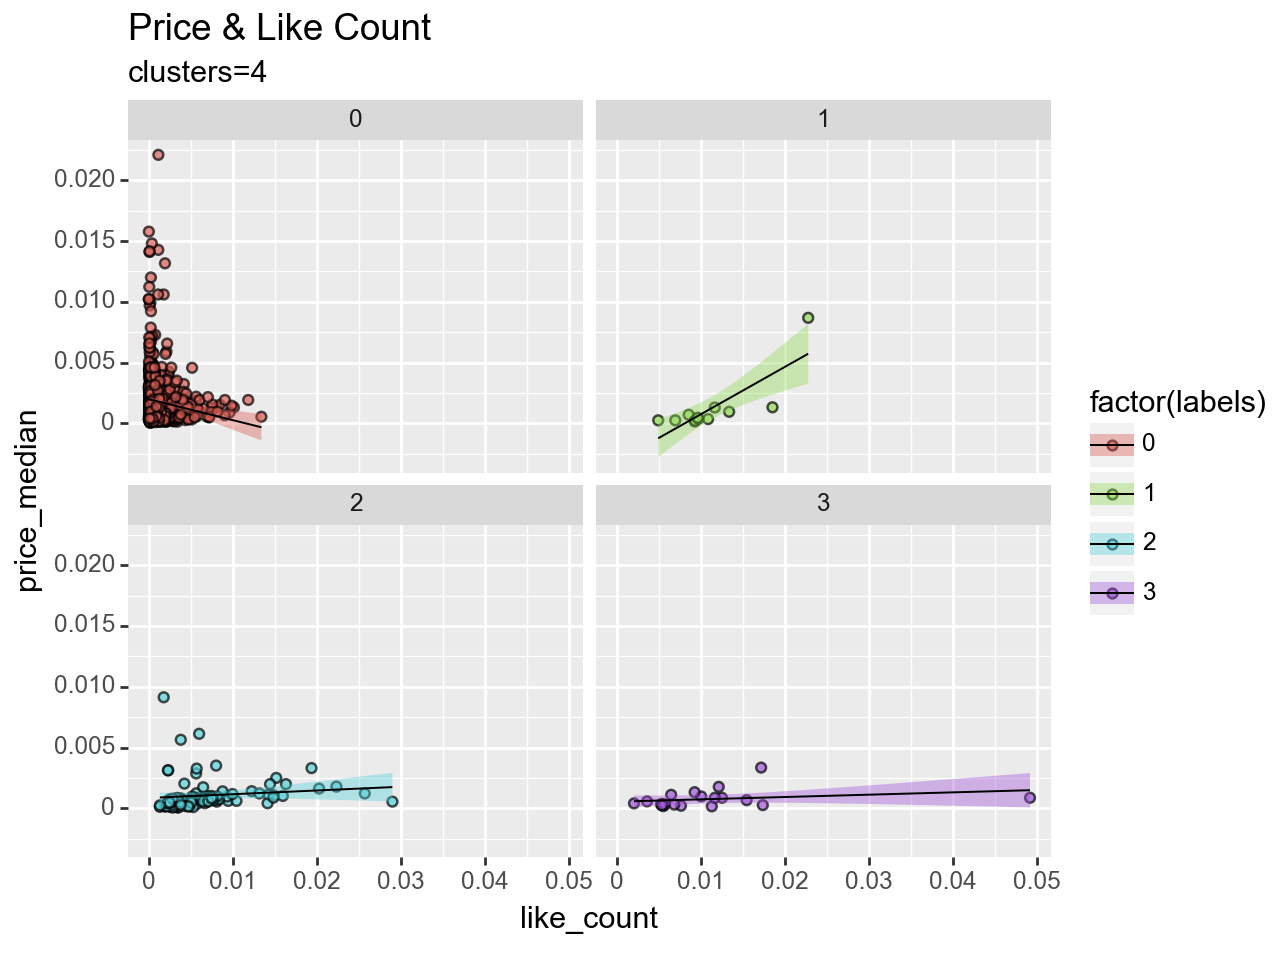

In [45]:
# visualize clusters
cluster_viz_2 = (ggplot(scaled_star_df, aes('like_count', 'price_median', fill='factor(labels)'))\
    + geom_point(alpha=.7)\
    + geom_smooth(method='lm', size=.4, color='black')
    + labs(title='Price & Like Count', subtitle='clusters=4')\
    + facet_wrap('~labels')).draw();

cluster_viz_2